In [11]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST
from PIL import Image

In [12]:
dataset = MNIST('C:/Users/nedob/Programming/Data Science/Datasets/MNIST_handwritten_numbers/archive')
# dataset = MNIST('C:/Users/79386/Programming/Data_science/Datasets/mnist')

train_images, train_labels = dataset.load_training()
test_images, test_labels = dataset.load_testing()
train_images, train_labels, test_images, test_labels = \
    torch.tensor(train_images), torch.tensor(train_labels), torch.tensor(test_images), torch.tensor(test_labels)

train_images = train_images.reshape(-1, 1, 28, 28)
test_images = test_images.reshape(-1, 1, 28, 28)

Work on averaging all the numbers throughout dataset.

In [13]:
mean_numbers = torch.zeros(10, 28, 28)

for i in range(train_images.shape[0]):
    mean_numbers[train_labels[i]] += train_images[i].reshape(28, 28)

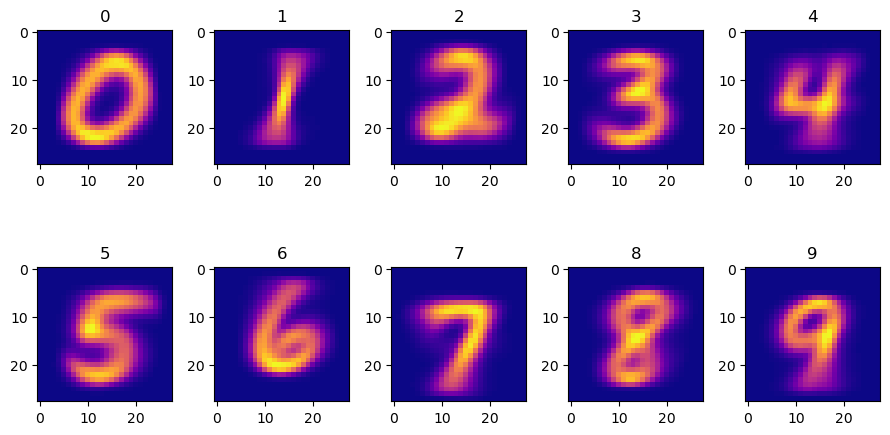

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(9, 5))

for i in range(2):
    for j in range(5):
        axes[i][j].imshow(mean_numbers[i * 5 + j], cmap='plasma')
        axes[i][j].set_title(i * 5 + j)

plt.tight_layout()
plt.show()

You may notice that they are aligned at the center but have some gaps on different sides. And they are almost the same from picture to picture. So to guess the number user has drawn, we must align it firstly. Average them all into a single image

In [15]:
mean_image = mean_numbers.mean(axis=0)
mean_image.shape

torch.Size([28, 28])

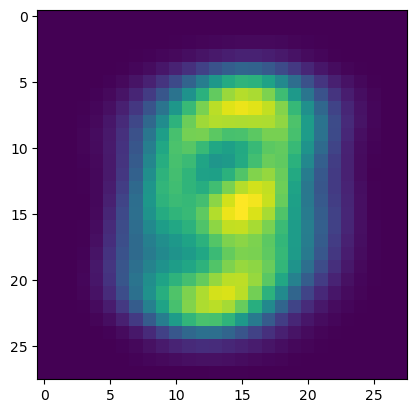

In [16]:
plt.imshow(mean_image)
plt.show()

Now calculate mean and std for each pixel in dataset for normalizing

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images.mean(), train_images.std()

(tensor(0.1307), tensor(0.3081))